This Project will be to analyze the Amazon E-Commerce Sales dataset to maximize online bisiness performance

Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
amazon = pd.read_csv('Amazon Sale Report.csv',low_memory=False)

In [8]:
amazon.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [9]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [10]:
amazon.nunique().to_frame(name='Count of unique values')

,Count of unique values
index,128975
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9


In [11]:
%pip install seaborn

In [12]:
import seaborn as sns

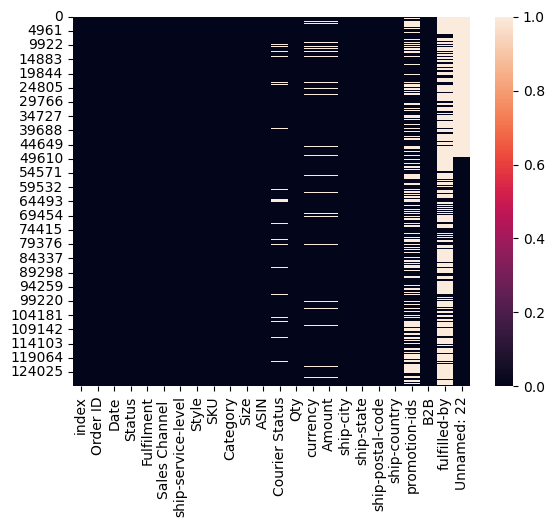

In [13]:
sns.heatmap(amazon.isnull())
plt.show()

In [14]:
amazon.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

Time to start cleaning data

First start be looking for null data 

In [16]:
amazon.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

Now to drop the columns that are not usefull to the analysis

In [21]:
amazon.drop(columns= ['index','Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel '], inplace = True)

In [22]:
amazon[amazon.duplicated(['Order ID','ASIN'], keep=False)]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
30660,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
41291,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
52330,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Cancelled,0,NaN,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
52333,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Shipped,1,487.0,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
79844,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
85790,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [23]:
amazon.drop_duplicates(['Order ID','ASIN'],inplace = True,ignore_index=True)

In [26]:
amazon['Courier Status'].fillna('unknown',inplace=True)
amazon['promotion-ids'].fillna('no promotion',inplace=True)
amazon[amazon['Amount'].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

Cancelled                       97.06%
Shipped                          2.67%
Shipped - Delivered to Buyer     0.10%
Shipping                         0.10%
Shipped - Returned to Seller     0.04%
Pending                          0.03%
Name: Status, dtype: object

In [27]:
amazon['Amount'].fillna(0,inplace=True)
amazon['ship-city'].fillna('unknown', inplace = True)
amazon['ship-state'].fillna('unknown', inplace = True)
amazon['ship-postal-code'].fillna('unknown', inplace = True)

Conversion from Indian currency to to the US Dollar

In [28]:
inr_2_usd = .0120988

In [31]:
amazon['Amount'] = amazon['Amount'].apply(lambda x: x * inr_2_usd)

In [32]:
amazon.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
promotion-ids         0
B2B                   0
dtype: int64

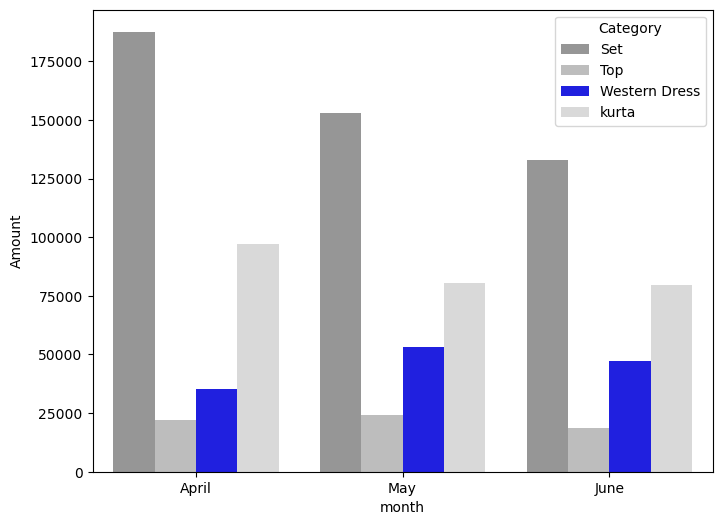

In [52]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize=(8,6))
month_order = ['April', 'May', 'June']

sales = amazon[amazon['Category'].isin(['Western Dress', 'Top', 'kurta', 'Set'])]
sales['Date'] = pd.to_datetime(sales['Date'])

sales['month'] = sales['Date'].dt.month_name()

saleseachmonth = sales.groupby(['month', 'Category'])['Amount'].sum().reset_index()

saleseachmonth['month'] = pd.Categorical(sales_by_month['month'], categories=month_order, ordered=True)

ax = sns.barplot(x='month', y='Amount', hue='Category', data=saleseachmonth,palette=['#969696', '#bdbdbd', 'blue', '#d9d9d9'])


Here we see that the western dress has had a 33% inc from april to june, while the other products are in a decline in terms of revenue. In order to best optimize sales the company should prioritize the sale of the western dress.